# Lecture 5: Bayesian Formalism 1
### Frequentist approach and Monte Carlo

AM207: Pavlos Protopapas, Harvard University

Feb 11, 2014

------


$\newcommand{\Lik}{p(D|\theta)}$

#Introduction 
We have seen the basic Monte Carlo techniques and before we embark into MCMC  the question is  how useful 
these methods are for the purpose of modeling or data analysis. In these lectures,
we will introduce these methods in the context of Bayesian data analysis.

The goal in many cases is to find parameter values in a probabilistic model that best explain the data. 

Let's assume that the data we want to analyze can be represented by $D$, and
that the parameters of a model are represented by $\theta$. Let's also assume that we have a
generative model that is designed to explain the data. We can then
defne the likelihood $p(D|\theta)$ of the model to describe how likely the data is according
to some instantiation of the model in terms of its model parameters $\theta$. 
The likelihood gives an explanation of the data in terms of
the parameters.

The primary goal in any modeling analysis is to choose parameters of a model such that
we can best explain the data with the model. There are a number of approaches to choose
model parameters. 


# FREQUENTIST STATISTICS


In frequentist approach, a parameter estimate is computed by using some function on the data $D$. 
In the world of frequentist there is a true vallue of the parameter, which is fixed, however  the data are random. This is the exact opposite of the Bayesian approach we see below.

In other words, assuming that a given distribution is a  description of the model, there is a true parameter $\theta^{\star}$ that desrcibes the problem. Given the data set we have, we can estimate the parameter $\hat{\theta}$ and if we could replicate the experiment many times we could use a sample of $\hat{\theta}$ and from those build the sampling distribution which can be used to estimate the error on the parameter estimation. By sampling $M$ Data sets $D_i$, each of size $N$, from some true model characterized by $\theta^{\star}$ we are able to calculate  $\hat{\theta}_i$, one for each dataset. And as $M\rightarrow \infty$ the distribution of $\hat{\theta}$'s becomes narrower and narrower and approaches $\theta^{\star}$. 

## Maximum Likelihood
A  basic approach to parameter estimation is maximum likelihood (ML). The goal here
is to find the parameter estimates that maximize the likelihood. Equivalently and numerically more stable is to find the minimum
of the minus log-Likelihood of the data given the model.

The likelihood gives us a measure of how likely it is to observe values $D={d_1,...,d_n}$ given the parameters $\theta$. 
The likelihood for a given datum is $ p(d_i|\theta)$ and for all the data asumming iid is

$$L=\Lik = \prod_{i=1}^{n} p(d_i|\theta)$$


How likely are the observations if the model is true?
This corresponds to maximizing the likelihood as a function of $\theta$ for a given set of observations. 

$$ \theta_{ML} = \arg \! \max_{\theta} \Lik $$

where the values $\theta$ can take any values. The ML estimate corresponds
to the values of the parameters that best agree with the actually observed data. 
This is a  very straightforward way of estimating parameters in a probabilistic model.
In some cases the actual value of $\theta_{ML} $ can be estimated analytically 
but in many  case, numerical techniques that explore the gradient of the likelihood function 
to find the solution such as Simulated Annealing or Genetic Algorithms. 
This estimation procedure does not correspond to a Bayesian approach. 

## Confidence intervals 
How is this related to the statement above about ensemble of data sets? We usually only have one dataset. As mentioned above the distribution of $\hat{\theta}$ are used to estimate the error on the estimate, or in simple words the standard deviation of the estimate. 

If the likelihood we use is a simple one or has nice algebraic properties, we can just use those to calculate confidence intervals. Confidence intervals tells us the range of values for a given confidence that the actual value of the parameter is within that interval.  For instance, we want to find the range such that the estimator in 90% of the samples would be contained in it. 

But many a time our likelihoods  are not analytically tractable. In this case resampling the ONE dataset we have can be done using Monte Carlo tecnigues. Resampling involves making new samples from the observations, "each of which can be analyzed in the same way to see how the statistics depend on plausible random variations in the observations". One way to do this is the Bootstrap method (see example in Lab).


$\newcommand{\bx}{{\bf x}}
\newcommand{\bX}{{\bf X}}
\newcommand{\by}{{\bf y}}
\newcommand{\bw}{{\bf w}}$


### Example: Linear regression
The goal  is to fit a straight line. 

$$ y = ax+b+\epsilon $$

where $\epsilon \sim N(0, \sigma)$. 

Let ${\bf x} =(x_1, x_2, \ldots, x_n)$  and
$ {\bf y} =(y_1, y_2, \ldots, y_n)$ are the actual data. 

For iid data the likelihood is
\begin{eqnarray} 
\Lik &=& p(\by|x,\bw) = \prod_{i=1}^{n} p(y_i| x_i, a, b) = \frac{1}{\sqrt{2\pi}\sigma}  \prod_{i=1}^{n} 
   \exp{ \left( -\frac{(y_i- (a \, x_i+b))^2}{2\sigma^2} \right)}  \nonumber \\ 
   &=& \frac{1}{\sqrt{2\pi}\sigma} \exp{\left( -\frac{ \sum_i(y_i-(a\,x_i +b))^2 }{2\sigma^2} \right)} 
   \end{eqnarray}
   
  The maximum of the likelihood and the log of the likelihood are identical and therefore
   it is more convenient to work with  

$$ {\cal L} =\log(L)  \propto  -\frac{ \sum_i [y_i-(a\,x_i +b)]^2 }{2\sigma^2} $$

Taking the derivatives with respect to $a$ and $b$ and setting them to zero, 
we can solve for $a$ and $b$ 

$$ a_{ML} = \frac{n \sum_i x_i y_i -\sum_i x_i \sum_i y_i}{n  \sum x_i^2 -(\sum_i x_i)^2} $$

$$ b_{ML} = \frac{1}{n} \left[ \sum_i y_i - a\sum_ix_i^2 \right] $$ 


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sn

from scipy.stats import norm


C:\Users\vkaynig\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# BAYESIAN INFERENCE
A Bayesian approach to parameter estimation is to treat $\theta$ as a random variable with an associate
prior distribution $p(\theta)$. The prior distribution tells us our belief on the
parameter values are when we have not observed any data yet. In a Bayesian context, the
goal is to estimate the posterior distribution over parameters given our data. This is also
known as posterior inference. In other words, we would like to know $p(\theta|D)$. To do so we 
use the Bayes rule to evaluate this conditional probability with:

\begin{equation} 
p(\theta|D)  = \frac{\Lik \, p(\theta)}{p(D)} 
\end{equation}

Note that $p(D)$ is independent of $\theta$ and therefore we can ignore
any constant of proportionality and just write:

$$ p(\theta|D)  \propto \Lik \, p(\theta) $$


## Maximum a posteriori


The posterior distribution is specified by a simple product of the likelihood (how
likely is the data given the model that uses these parameter estimates) and the prior. 
In Bayesian data analysis, one way to
apply a model to data is to find the maximum a posteriori (MAP) parameter values.
The goal in this case is to find the parameter  that maximize the posterior probability of the
parameters given the data. In other words, we find the mode of the posterior distribution.
This corresponds to:

\begin{eqnarray}
 \theta_{{\rm MAP}} &=& \arg \max_{\theta} \, p(\theta | D)  \nonumber \\ 
                               & =& \arg \max_{\theta}  \frac{\Lik \, p(\theta)}{p(D)}  \nonumber \\ 
                               & =& \arg \max_{\theta}  \, \Lik \, p(\theta) \nonumber \\ 
\end{eqnarray}

This looks similar to the maximum likelihood estimation procedure. The difference is that
the prior we set over the parameters does influence the parameter estimation. 
Although it seems that the prior should not play a role in parameter
estimation, there are some good reasons to prefer the MAP over the ML estimation, especially
when only few data points are available or when the data is degenerate in some way (e.g.,
the data shows no variation). There is a large literature on this, and we will not review it
here.

## Posterior Sampling
What we are really interested in Bayesian approach is posterior sampling. 
With the MAP approach, we get a single set of parameter values for a model. Therefore,
we are characterizing the posterior distribution with the mode of this distribution. This 
is  very clear and useful but it has some drawbacks. Suppose the
posterior distribution is multimode. We should be interested to know 
the other high probability parameter values. 
Also, there are cases that there are degeneracies. For example a model with two parameters A
and B and we achieve high posterior probability by either setting A to a high value and B
to a low value or the other way around, setting A to a low and B to a high value. In a MAP
estimate, we are not getting an understanding of such parameter correlations, but we can
measure such correlations using posterior sampling.
In the general Bayesian approach, the goal is to characterize the full posterior
distribution and not to simply find the mode of this distribution. In some cases, we might
be able to find an analytic expression for the posterior distribution. However, in many cases,
we have to resort to sampling techniques, such as inverse transform, rejection method, MCMC etc, to get samples from the posterior
distribution. These samples can be used to calculate a number of things, such as means,
variances, marginal distributions, conditional distributions,  correlations amongst parameters etc. 

MCMC is the workhorse for sampling posterior distribution. Therefore, all the methods that we will be discussing in the coming lectures can be used for the problem of posterior inference. 

### Example: Linear regression of one dimensional straight line
Again, the goal  is to fit a straight line. 

$$ y = ax+b+\epsilon$$

where $\epsilon \sim N(0, \sigma)$
and predict $y$ at various $x$'s. 

Let ${\bf x} =(x_1, x_2, \ldots, x_n)$  and
$ {\bf y} =(y_1, y_2, \ldots, y_n)$ are the actual data. 

Using Bayesian formalism, we want to estimate the posteriors of the parameter
$\theta =a$ assuming $b=0$. 

We use  priors $a \sim N(0, \sigma_a)$.

 
The implementation below estimates the posterior using Bayes rule  and also samples 
directly from the product of the likelihood (same as the one in the MLE section above) and prior using the rejection method. 



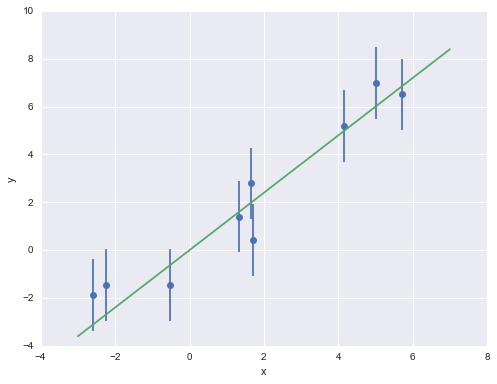

In [2]:
plt.figure(figsize=[8,6])

## GENERATE SYNTHETIC DATA
n=9
a = 1.2 # SLOPE
b = 0 # INTERSECTION 

s = 1.5 # STD OF ERROR 

x = np.random.uniform(low=-3, high=7, size=n) 
y = a*x+ b + s*np.random.randn(n)


#plt.subplot(2,2,2) 
plt.errorbar(x,y, yerr=s, fmt='o')
plt.xlabel('x')
plt.ylabel('y')

xr = np.linspace(-3, 7, 100) 
plt.plot(xr, a*xr)


Using priors with mean 0 and $\sigma_a^2=4$. $a \sim N(0, \sigma_a)$

1.12038648795 0.0


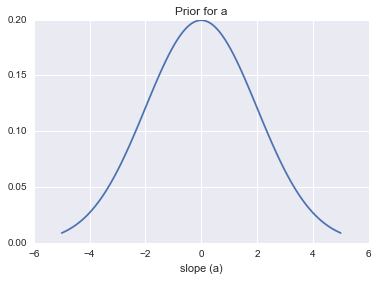

In [3]:
plt.figure(figsize=[6,4])
## ANALYTIC SOLUTION TO THE MAXIMUM LIKELIHOOD 
a = (n*np.sum(x*y)-np.sum(x)*np.sum(y))/(n*np.sum(x**2)-(np.sum(x))**2)
b = (1/n)*(np.sum(y)-a*np.sum(x))
print a, b
# ======================================
## PLOT THE PDF OF THE PRIOR
# ======================================
I = np.eye(2)

## PRIOR 
sig2 = 4   # WIDTH OF THE PRIOR

p_w = lambda (w) : (1/np.sqrt(2*np.pi*sig2))*np.exp( - (w**2)/(2*sig2))

asp = np.linspace(-5,5, 100)

P=p_w(asp)

plt.plot(asp, P)
plt.xlabel('slope (a)')
plt.title('Prior for a')

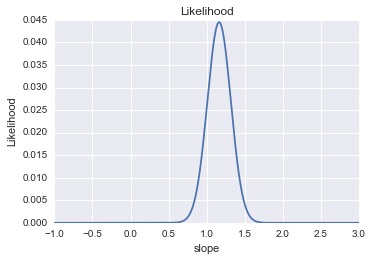

In [4]:
plt.figure(figsize=[12,8])

## PLOT THE PDF OF THE LIKELIHOOD
N=1000
asp = np.linspace(-1,3, N)

p_l = lambda (asp) : (1/np.sqrt(2*np.pi*s**2))*np.exp( - (np.sum( x*x*(y/x-asp)**2)/(2*s**2)))

P=np.zeros(N)

for k in np.arange(0, asp.size):
    P[k] = p_l(asp[k])


plt.subplot(2,2,1)
plt.plot(asp, P)
plt.xlabel('slope')
plt.ylabel('Likelihood')

plt.title('Likelihood');
        



In [5]:
print np.mean(y/x), np.dot(y, 1/x), np.sqrt(s**2/(np.dot(1/x,1/x)))

1.21795766449 10.9616189804 0.644066299834


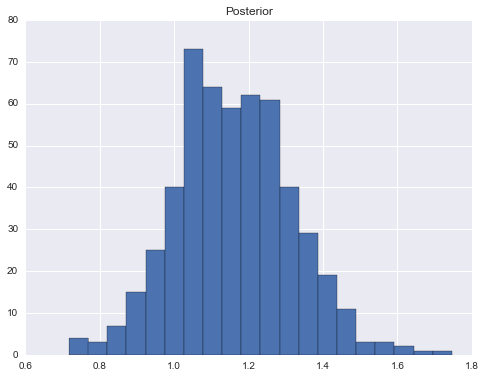

In [6]:
plt.figure(figsize=[8,6])
## NOW SAMPLE FROM THE POSTERIOR USING REJECTION METHOD 
N=30000
asp = np.random.uniform(low=-10, high=10, size=N)



post = lambda(wsp): p_l(wsp) * p_w(wsp) 

ptr = np.zeros(N)

for k in np.arange(0, N):
    ptr[k]= post(asp[k]) 


ysp =  np.random.uniform(low=0, high=np.max(ptr), size=N)
    
idx = (ysp<ptr)


g=plt.hist(asp[idx], 20);

plt.title('Posterior');

In [7]:
print np.sum(idx), np.mean(asp[idx])


522 1.16030604147


### Example: Infectious disease in a small city
Suppose $\theta$ is the fraction of infected individual in a small city. 
A small sample of $n=20$ individual from the city are checked and 
the total number of people infected is $k=3$.   
Question: What is the fraction of infected individuals?

For each individual the probability of being infected is $\theta$ so the total 
number of infected people given a sample of 20 is given 
by a binomial. 

$$\Lik = p(n,k|\theta) = B(n,k, \theta)=\frac{n!}{k! (n-k)! } \, \theta^k \, (1-\theta)^{(n-k)} $$

Studies from other cities shows that $\theta$ varies from 0.05 to 0.20 
with an average value  of 0.10. We can choose any prior that encapsulates 
this information. In our example (the reasons will be obvious later) we 
choose as prior the beta distribution and choose $\alpha=2$ and $\beta=20$
such as the mean of the prior is 0.10 and the range to be consistent with
what we know from other cities (mean of Beta is $\frac{\alpha}{\alpha+\beta}$),

$$ p(\theta) = {\rm Beta}(\theta,\alpha, \beta) = \frac{\theta^{\alpha-1} (1-x)^{\beta-1} }{B(\alpha, \beta)} $$
where $B(\alpha, \beta)$ is independent of $\theta$ and it is the normalization factor.

From Bayes theorem, the posterior for $\theta$ is 

$$ p(\theta|D) \propto  p(\theta) \, p(n,k|\theta)  =  B(n,k, \theta) \,  {\rm Beta}(\theta,\alpha, \beta)  $$

which can be shown to be 

$$ p(\theta) p(n,k|\theta) = {\rm Beta}(\theta, \alpha+k, \beta+n-k) =  {\rm Beta}(\theta, 5, 37) $$



Sometimes we may want to summarize other aspects of a posterior distribution. For example 
we may want to compare two or more populations. In that case we may be interested in the posterior 
distribution of $\theta_1 - \theta_2$, $\theta_1/\theta_2$ or $\max\{\theta_1,\ldots, \theta_m\}$. If we can 
generate random samples from these distributions, then all of these posterior quantities can be 
approximated to an arbitrary degree of precision using MC methods. 

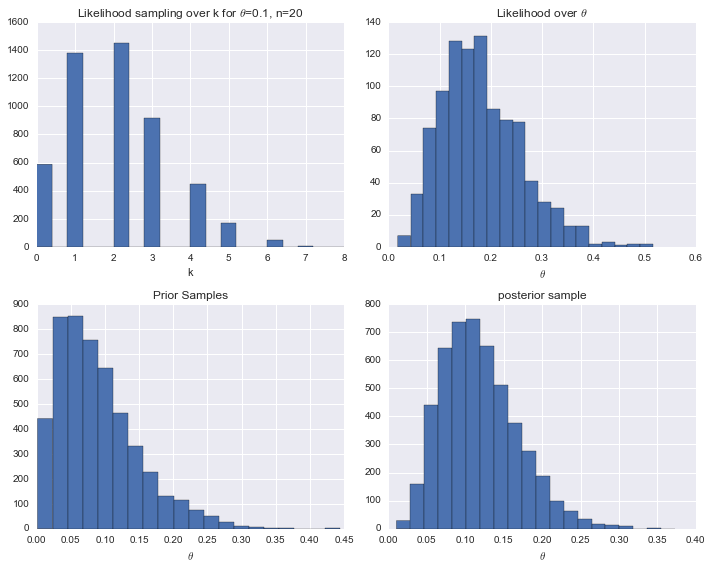

In [8]:
plt.figure(figsize=[10,8])
## INITIALIZING
n = 20 # number of data
N =5000 # samples
k=3  # binomial k

## THE LIKELIHOOD:BINOMIAL 
theta=0.1

liks  = np.random.binomial( n, theta, [N,1]);

plt.subplot(2,2,1)
plt.hist(liks, 20)
plt.title('Likelihood sampling over k for $\\theta$=0.1, n=20')

plt.xlabel('k')

# I need samples of theta
lik_theta = lambda (theta): theta**k * (1-theta)**(n-k)
#use rejection to get this distribution 
X=np.random.uniform(low=0, high=1, size=N)
Y=np.random.uniform(low=0, high=0.000213, size=N)
Yt = lik_theta(X) 

Xa = X[Y<Yt]
plt.subplot(2,2,2)
plt.hist(Xa, 20)
plt.xlabel('$\\theta$')
plt.title('Likelihood over $\\theta$')

## PRIOR
alpha=2
beta=20
prs = np.random.beta(alpha, beta, [N,1]);

plt.subplot(2,2,3)
plt.hist(prs, 20)
plt.title('Prior Samples')
plt.xlabel('$\\theta$')
## POSTERIOR EXACT

posts = np.random.beta(alpha+k, beta+n-k, [N,1]);
plt.subplot(2,2,4) 
plt.hist(posts, 20)
plt.title('posterior sample')
plt.xlabel('$\\theta$');
plt.tight_layout()

## Conjugate Priors
In the previous examples we saw one example (prevalence of an infectious disease in a small city) in which 
the prior distribution for an unknown parameter $\theta$ led to a posterior distribution 
that is  in the same family as the prior probability distribution. 
The prior and posterior are then called __conjugate distributions__, and the prior is called a __conjugate prior__ for the likelihood. 
We will return to this later. 

## The Normal Model

Perhaps the most useful and most used probability model for data analysis is the normal distribution. 
 There are several reasons for this, one being the central limit theorem, and another being the normal
 model is simple model with parameters for the population mean and variance.  What we are interested 
 is how to make posterior inference on the population mean and variance parameters. 
 
 A random variable $Y$ is said to be normally distributed with mean $\mu$ and variance $\sigma^2$ if the 
 density of $Y$ is given by 
 $$ p(y|\mu, \sigma^2) =  \frac{1}{ \sqrt{ 2 \pi \sigma^2}} e^{-( \frac{y-\mu}{2 \sigma})^2} $$
 
 The importance of the normal distribution stems primarily from the central limit theorem,
 which says that under very general conditions, the sum (or mean) of a set of random
 variables is approximately normally distributed. In practice, this means that the 
 normal sampling model will be appropriate for data that result from the additive effects of a large
 number of factors.
 
 For example the height in inches of male students at Harvard is observed to follow the 
 normal distribution. The variability of the heights among the students  may be heterogenous in nature,
 depending on a number of factors controlling the human growth (genetics, diet, stress etc). 
 If the effect of these factors are approximately additive, then each height measurement $y_i$ is roughtly 
 equal to a linear combination of a large number of terms. The central limit theorem says that the 
 empirical distribution of $y_i, \ldots, y_n$ will look like a normal distribution.
 
Now suppose our model is $\{y_1, \ldots, y_n|\mu, \sigma^2 \} \sim N(\mu, \sigma^2)$ then
the joint distribution is 

$$
p(y_1, \ldots, y_n| \mu, \sigma^2) = 
\prod_{i=1}^{n} p(y_i| \mu, \sigma^2)=\prod_{i=1}^{n}  \frac{1}{ \sqrt{ 2 \pi \sigma^2}} e^{-( \frac{(y_i-\mu)^2}{2\sigma^2})} = 
\frac{1}{ \sqrt{ 2 \pi \sigma^2}}   \exp \left\{  - \frac{1}{2}  \sum_i \frac{(y_i-\mu)^2}{\sigma^2} \right\} 
$$

Expanding this out 

$$\sum_{i}^{n}  \frac{(y_i-\mu)^2}{\sigma^2}  = \frac{1}{\sigma^2} \sum_i y_i^2 - 2 \frac{\mu}{\sigma^2} \sum_i y_i + n \frac{\mu^2}{\sigma^2} $$

and one can see that the sums,  $\{ \sum y_i^2 , \sum y_i \} $, make up a two dimensional sufficient statistics.

We now break the problem into two one parameter problems. Firstly lets see the posterior of $\mu$ assuming we 
know $\sigma^2$ and then the other way.  For any conditional prior the posterior 

$$ p( \mu |  y_1, \ldots, y_n, \sigma^2)  \propto p(\mu| \sigma^2) \,e^{ - \frac{1}{2\sigma^2} \sum (y_i - \mu)^2 }$$

For a prior to be a conjugate the resulting posterior must be in the same class. 

Obviously the simplest conjugate then is the normal itself. 

Say 
$$ p(\mu | \sigma^2) = \exp \left\{ -\frac{1}{2 \tau^2} (\hat{\mu}-\mu)^2 \right\} $$

then the posterior is 

$$  p( \mu |  y_1, \ldots, y_n, \sigma^2) \propto \exp \left\{ -\frac{a}{2} (\mu-b/a)^2 \right\} $$
where 
$$ a = \frac{1}{\tau^2} + \frac{n}{\sigma^2} , \;\;\;\;\; b = \frac{\hat{\mu}}{\tau^2} + \frac{\sum y_i}{\sigma^2} $$
This is a normal density curve with $1/\sqrt{a}$ playing the role of the 
standard deviation and $b/a$ playing the role of the mean. Re-writing this, 

$$ p( \mu |  y_1, \ldots, y_n, \sigma^2)  \propto \exp\left\{ -\frac{1}{2} \left( \frac{\mu-b/a}{1/\sqrt(a)}\right)^2 \right\} $$


Define $\kappa = \sigma^2 / \tau^2 $ to be the variance of the sample model  in units of variance
of our prior belief (prior distribution) then the posterior mean  

$$\mu_p = \frac{ \kappa}{\kappa + n }  \hat{\mu} + \frac{n}{\kappa + n} \bar{y} $$

which is a weighted average of prior mean and sampling mean.
The variance is 

$$ \tau_p^2 = \frac{1}{1/\tau^2+n/\sigma^2} $$
or better 

$$ \frac{1}{\tau_p^2} = \frac{1}{\tau^2} + \frac{n}{\sigma^2} $$


## Example: Moth wing 
We have data on the wing length in millimeters of a nine 
members of a particular species of moth.  We wish to make inferences from those measurements on the 
population mean $\mu$.  Other studies show the wing length to be around 19 mm. We also 
know that the length must be positive. 
We can choose a prior that is normal and most of the density is above zero ($\mu=19, \tau = 10$). 
The measurements were: 16.4, 17.0, 17.2, 17.4, 18.2, 18.2, 18.2, 19.9, 20.8 giving $\bar{y}=18.14$. 
Using the formulas above we have ($\kappa =  \sigma^2/\tau^2 = \sigma^2/100$): 
$$ \mu_p = \frac{\sigma^2/100}{\sigma^2/100+9 } 19  +  \frac{9}{\sigma^2/100+9} 18.14     $$

$$  1/ \tau_p^2 = 1/100+9/\sigma^2 $$

Remember this was derived assuming we knew $\sigma$. Say $\sigma^2 = s^2 = 1.9928$ then 
$$p(\theta|y_1 \ldots y_9, \sigma^2 = 1.9928 ) \sim N(18.14, 0.47) $$




In [9]:
Y = [16.4, 17.0, 17.2, 17.4, 18.2, 18.2, 18.2, 19.9, 20.8]
# Prior mean
mu_prior = 19.5
# prior std
tau = 10 
N = 10000

In [10]:
#Data Quantities
sig = np.std(Y) # assume that is the value of KNOWN sigma (in the likelihood)
mu_data = np.mean(Y)
n = len(Y)
kappa = sig**2 / tau**2
sig_post =1./( 1./tau**2 + n/sig**2);
# posterior mean
mu_post = kappa / (kappa + n) *mu_prior + n/(kappa+n)* mu_data

#samples
theta_prior = np.random.normal(loc=mu_prior, scale=tau, size=N);
theta_post = np.random.normal(loc=mu_post, scale=sig_post, size=N);

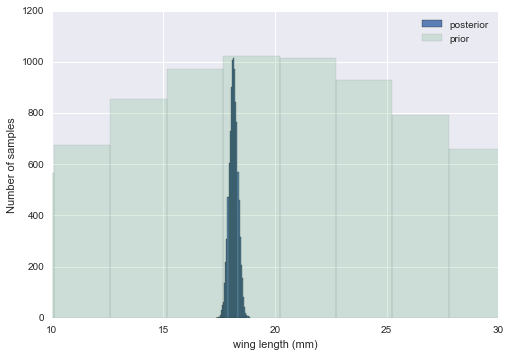

In [11]:
plt.hist(theta_post, bins=30, alpha=0.9, label="posterior");
plt.hist(theta_prior, bins=30, alpha=0.2, label="prior");
plt.xlim([10, 30])
plt.xlabel("wing length (mm)")
plt.ylabel("Number of samples")
plt.legend();